In [1]:
import numpy as np
import scipy as sp
import scipy.linalg
import sympy as sy
sy.init_printing() 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')

In [2]:
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

In [3]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [4]:
def round_expr(expr, num_digits):
    return expr.xreplace({n : round(n, num_digits) for n in expr.atoms(sy.Number)})

# <font face="gotham" color="purple"> Visualization of Determinants</font>

The physical idea of determinants is compute the area surrounded by vectors, for instance we have a matrix
$$
A=\left[\begin{matrix} a & b\cr c & d \end{matrix}\right]
$$
Then the determinant is the parallelogram form by 
$$
\left[\begin{matrix} a \cr c  \end{matrix}\right]\qquad \left[\begin{matrix} b \cr d  \end{matrix}\right]
$$

Here we demonstrate with a matrix
$$
\left[\begin{matrix} 2 & 0\cr 0 & 3 \end{matrix}\right]
$$
It's also easy to understand the area formed by these two vectors are actually a rectangle.

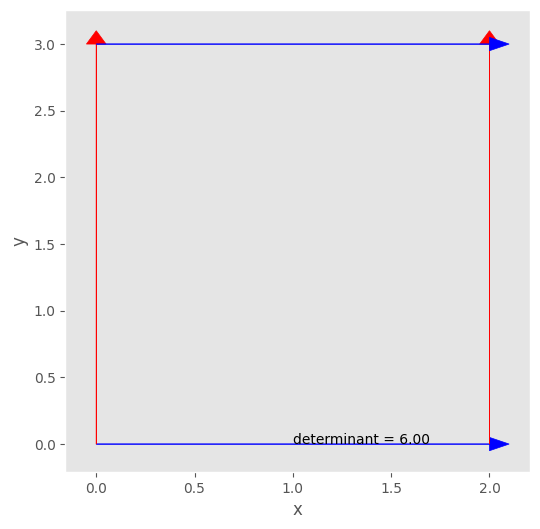

In [5]:
matrix = np.array([[2, 0], [0, 3]])
def plot_2ddet(matrix):
    # Calculate the determinant of the matrix
    det = np.linalg.det(matrix)

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(6, 6))

    # Plot the vectors
    ax.arrow(0, 0, matrix[0,0], matrix[0,1], head_width=0.1, head_length=0.1, color='b')
    ax.arrow(0, 0, matrix[1,0], matrix[1,1], head_width=0.1, head_length=0.1, color='r')
    ax.arrow(matrix[0,0], matrix[0,1], matrix[1,0], matrix[1,1], head_width=0.1, head_length=0.1, color='r')
    ax.arrow(matrix[1,0], matrix[1,1], matrix[0,0], matrix[0,1], head_width=0.1, head_length=0.1, color='b')

    # Annotate the determinant value
    ax.annotate(f'determinant = {det:.2f}', (matrix[0,0]/2, matrix[0,1]/2))

    # Add labels and show the plot
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.grid()
    plt.show()
    
if __name__ == '__main__':
    plot_2ddet(matrix)

If the matrix is not diagonal, the area will takes a form of parallelogram. Similarly, you can imagine in 3D space, determinant measure the volume of parallelepiped. 

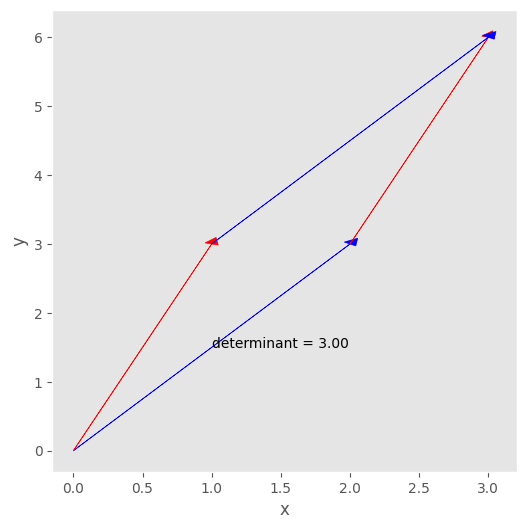

In [6]:
matrix = np.array([[2, 3], [1, 3]])
plot_2ddet(matrix)

However, determinant can be a _negative number_, it means we flip the area like flipping a piece of paper.

What if two vectors are linearly dependent? The area between vectors will be zero.

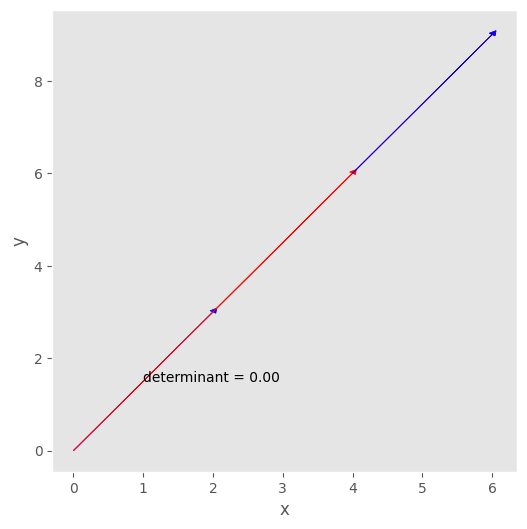

In [7]:
matrix = np.array([[2, 3], [4, 6]])
plot_2ddet(matrix)

<div style="background-color:Bisque; color:DarkBlue; padding:30px;">
This is the exact reason if we want a matrix to have full rank or linear independent columns, the determinant can't equal to zero!
</div>

Here's a plot of parallelepiped, in case you are not sure what it is.

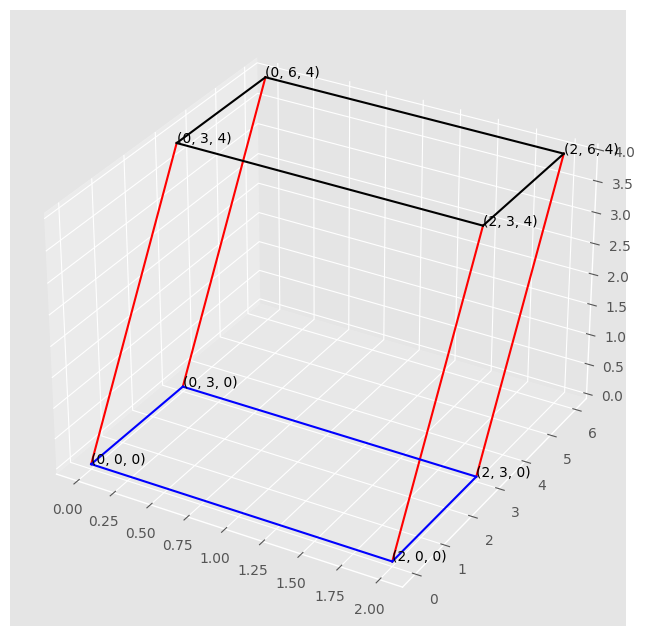

In [8]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Define the vertices of the parallelepiped
vertices = [[2, 0, 0], [2, 3, 0], [0, 3, 0], [0, 0, 0],
            [2, 3, 4], [2, 6, 4], [0, 6, 4], [0, 3, 4]]

# Plot the edges of the parallelepiped
for i in range(4):
    xs = [vertices[i][0], vertices[i+4][0]]
    ys = [vertices[i][1], vertices[i+4][1]]
    zs = [vertices[i][2], vertices[i+4][2]]
    ax.plot(xs, ys, zs, color='red')

for i in range(4):
    xs = [vertices[i][0], vertices[(i+1)%4][0]]
    ys = [vertices[i][1], vertices[(i+1)%4][1]]
    zs = [vertices[i][2], vertices[(i+1)%4][2]]
    ax.plot(xs, ys, zs, color='blue')

for i in range(4,8):
    xs = [vertices[i][0], vertices[(i+1)%4+4][0]]
    ys = [vertices[i][1], vertices[(i+1)%4+4][1]]
    zs = [vertices[i][2], vertices[(i+1)%4+4][2]]
    ax.plot(xs, ys, zs, color='k')

# Add annotations for the coordinates at each vertex
for vertex in vertices:
    ax.text(vertex[0], vertex[1], vertex[2], f"({vertex[0]}, {vertex[1]}, {vertex[2]})")

plt.show()

# <font face="gotham" color="purple"> Computation of Determinants</font>

For $2\times 2$ matrix $A$, the algorithm of determinant is
$$
  A=\left|\begin{matrix} a & b\cr c & d \end{matrix}\right| \qquad\text{is equivalent to}\qquad \text{det}  A=ad-bc
$$

Now we experiment with SymPy

In [9]:
a, b, c, d, e, f, g, h, i = sy.symbols('a, b, c, d, e, f, g, h, i', real = True)

With defined symbols, the algorithms of $2\times 2$ and $3\times 3$ determinants are

In [10]:
A = sy.Matrix([[a, b], [c, d]])
A.det()

In [11]:
B = sy.Matrix([[a, b, c], [d, e, f], [g, h, i]])
B.det()

## <font face="gotham" color="purple"> Cofactor Expansion</font>

 The $(i,j)$-**cofactor** of $  A$ is denoted as $C_{ij}$ given by
 $$C_{i j}=(-1)^{i+j} \operatorname{det} A_{i j} = (-1)^{i+j} M_{ij}$$
 where $M_{ij}$ is the **minor determinant** which excludes $i$th row and $j$th column.

Consider a matrix $  A$
$$A=\left[\begin{array}{rrr}
1 & 5 & 0 \\
2 & 4 & -1 \\
0 & -2 & 0
\end{array}\right]$$
Any determinants can be expanded long its arbitrary row or column, we expand the determinant via the first row
$$\begin{aligned}
\operatorname{det} A &=1 \cdot \operatorname{det}\left[\begin{array}{rr}
4 & -1 \\
-2 & 0
\end{array}\right]-5 \cdot \operatorname{det}\left[\begin{array}{cc}
2 & -1 \\
0 & 0
\end{array}\right]+0 \cdot \operatorname{det}\left[\begin{array}{rr}
2 & 4 \\
0 & -2
\end{array}\right] \\
&=1(0-2)-5(0-0)+0(-4-0)=-2
\end{aligned}$$

The scalars, $1$, $-5$ and $0$, in front of each minor determinant are the elements of first row of $  A$.

In general, the expansions across $i$th row or $j$th column are
$$
\operatorname{det} A=a_{i 1} C_{i 1}+a_{i 2} C_{i 2}+\cdots+a_{i n} C_{i n}
$$
$$
\operatorname{det} A=a_{1 j} C_{1 j}+a_{2 j} C_{2 j}+\cdots+a_{n j} C_{n j}
$$

### <font face="gotham" color="purple"> A SymPy Example of Determinant Expansion</font>

Consider the matrix below and perform a cofactor expansion

In [12]:
A = sy.Matrix([[49, 0, 61], [73, 22, 96], [2, 0, 32]]);A

⎡49  0   61⎤
⎢          ⎥
⎢73  22  96⎥
⎢          ⎥
⎣2   0   32⎦

Cofactor expansion with the column which has two zero(s) involves the least computation burden:

$$\operatorname{det} A = a_{12}(-1)^{1+2}C_{12}+a_{22}(-1)^{2+2}C_{22}+a_{32}(-1)^{3+2}C_{32}$$

We can use SymPy function for calculationg minors: ```sy.matrices.matrices.MatrixDeterminant.minor(A, i, 1)```. Also we define a function for cofactor expansion:

In [13]:
def cof_exp(matrix, c): # c is the col that we want to expand
    detA = 0
    for i in range(matrix.shape[1]): # matrix.shape[1] is the total number of columns
        detA += matrix[i, c]*(-1)**(i+c)*sy.matrices.matrices.MatrixDeterminant.minor(matrix, i, c)
    return detA

In [14]:
cof_exp(A,1)

It's easy to verify the expansion algorithm Sympy's determinant evaluation function.

In [15]:
A.det()

Actually you can experiment with any random matrices with multiple zeros, the function below has the parameter ```percent=70``` which means $70\%$ of element are non-zero.

In [16]:
B = sy.randMatrix(r = 7, min=10, max=50, percent=70);B

⎡0   46  0   25  45  37  0 ⎤
⎢                          ⎥
⎢24  32  0   47  43  0   12⎥
⎢                          ⎥
⎢0   47  38  15  16  19  25⎥
⎢                          ⎥
⎢35  0   11  12  0   28  0 ⎥
⎢                          ⎥
⎢50  24  24  35  13  34  43⎥
⎢                          ⎥
⎢33  45  50  13  30  0   0 ⎥
⎢                          ⎥
⎣0   45  25  23  0   0   0 ⎦

Calculate determinants with our user-defined function

In [17]:
cof_exp(B,1)

Then verify the result of using determinant method  ```.det()```. We can see indeed cofactor expansion works!

In [18]:
B.det()

**Minor matrices** can also be extracted by using code ```sy.matrices.matrices.MatrixDeterminant.minor_submatrix()```, for instance, the $M_{23}$ matrix of $  B$ is

In [19]:
sy.matrices.matrices.MatrixDeterminant.minor_submatrix(B, 1, 2) # Pythonic indexing

⎡0   46  25  45  37  0 ⎤
⎢                      ⎥
⎢0   47  15  16  19  25⎥
⎢                      ⎥
⎢35  0   12  0   28  0 ⎥
⎢                      ⎥
⎢50  24  35  13  34  43⎥
⎢                      ⎥
⎢33  45  13  30  0   0 ⎥
⎢                      ⎥
⎣0   45  23  0   0   0 ⎦

**Cofactor matrix** is the matrix contain all cofactors of original matrix, and function ```.cofactor_matrix()``` can do the job.

$$A=\left[\begin{array}{rrr}
C_{11} & C_{12} & C_{13} \\
C_{21} & C_{22} & C_{23} \\
C_{31} & C_{32} & C_{33}
\end{array}\right]=
\left[\begin{array}{rrr}
(-1)^{1+1}M_{11} & (-1)^{1+2}M_{12} & (-1)^{1+3}M_{13} \\
(-1)^{2+1}M_{21} & (-1)^{2+2}M_{22} & (-1)^{2+3}M_{23} \\
(-1)^{3+1}M_{31} & (-1)^{3+2}M_{32} & (-1)^{3+3}M_{33}
\end{array}\right]
$$



In [20]:
sy.matrices.matrices.MatrixDeterminant.cofactor_matrix(A)

⎡ 704   -2144  -44 ⎤
⎢                  ⎥
⎢  0    1446    0  ⎥
⎢                  ⎥
⎣-1342  -251   1078⎦

## <font face="gotham" color="purple"> Triangular Matrix</font>

If $A$ is triangular matrix, cofactor expansion can be applied repetitively, the outcome will be a product of the elements on the principal diagonal. 

$$
\operatorname{det A}_{n\times n} = \prod_{i=1}^n a_{ii}
$$

where $a_{ii}$ is the diagonal element. 

Here is the proof, start with $A$

$$
A=\left[\begin{array}{cccc}
a_{11} & a_{12} & \cdots & a_{1 n} \\
& a_{22} & \cdots & a_{2 n} \\
& & \ddots & \\
& & & a_{n n}
\end{array}\right]
$$
Cofactor expanding on the first column, 
$$
a_{11} \cdot \left[\begin{array}{cccc}
a_{22} & a_{22} & \cdots & a_{2 n} \\
& a_{33} & \cdots & a_{3 n} \\
& & \ddots & \\
& & & a_{n n}
\end{array}\right]
$$
Continue the cofactor expansion
$$
\operatorname{det} A=a_{11} a_{22} \cdot \left[\begin{array}{cccc}
a_{33} & a_{34} & \cdots & a_{3 n} \\
& a_{44} & \cdots & a_{4 n} \\
& & \ddots & \\
& & & a_{n n}
\end{array}\right]
$$
Iterating the expansion, eventually
$$
\text { Det } A=a_{11} \cdots a_{n-2, n-2} \cdot \left[\begin{array}{cc}
a_{n-1, n-1} & a_{n-1, n} \\
a_{n n}
\end{array}\right]=a_{11} \cdots a_{n n}
$$

Now let's verify with a numeric example, generate a random upper triangular matrix.

In [21]:
A = np.round(np.random.rand(5,5)*100)
A_triu = np.triu(A); A_triu

array([[ 8., 35.,  0., 40., 55.],
       [ 0.,  9.,  8., 51., 45.],
       [ 0.,  0., 41.,  0., 68.],
       [ 0.,  0.,  0., 76., 80.],
       [ 0.,  0.,  0.,  0.,  1.]])

Compute the determinant with ```np.linalg.det```

In [22]:
np.linalg.det(A_triu)

Extract the diagonal by ```np.diag()```, then calculate the product. The same results!

In [23]:
A_diag = np.diag(A_triu)
np.prod(A_diag)

## <font face="gotham" color="purple"> Properties of Determinants</font>

Determinants has a long list of properties, however they are mostly derived facts from cofactor expansion. So no need to memorise any of them.
    
1. Let $A$ be an $n×n$ square matrix. If one row of $A$ is multiplied by $k$ to produce the matrix $B$, then: $\text{det} B = k\, \text{det} A$.
2. Let $A$ be an $n×n$ square matrix. If two rows of $A$ are interchanged to produce a matrix $B$ , then $\text{det}B=-\text{det}A$.
3. Let $A$ be an $n×n$ square matrix. If a multiple of one row of $A$ is added to another row to produce the matrix $B$, then $\text{det}A=\text{det}B$.
4. If $A$ is an $n×n$ matrix, then $\text{det}A^T = \text{det}A$
5. A square matrix $A$ is invertible if and only if $\text{det}A\neq 0$
6. If $A$ and $B$ are $n×n$ matrices, then $\text{det}AB = (\text{det}{A})(\text{det}{B})$
7. If $A$ is an $n×n$ matrix and $k$ is a scalar, then $\text{det}\,kA=k^n\,\text{det}A$.
8. If $A$ is an invertible square matrix, then $\text{det}A^{-1}=\frac{1}{\det A}$.
</font>

All of them are straightforward, the key is to demonstrate them via cofactor expansion. Here is some unrigorous proofs.

<font face="gotham" color="red">Proof of property 6</font>:
$$\begin{aligned}
|A B| &=\left|E_{p} \cdots E_{1} B\right|=\left|E_{p}\right|\left|E_{p-1} \cdots E_{1} B\right|=\cdots \\
&=\left|E_{p}\right| \cdots\left|E_{1}\right||B|=\cdots=\left|E_{p} \cdots E_{1}\right||B| \\
&=|A||B|
\end{aligned}$$

<font face="gotham" color="red">Proof of property 7</font>:

Because $\text{det} B = k\, \text{det} A$, one row of $A$ is multiplied by $k$ to produce $B$.Then multiply all the rows of $A$ by $k$, there will be $n$ $k$'s in front of $\text{det} A$, which is $k^n \text{det} A$

<font face="gotham" color="red">Proof of property 8</font>:
$$\begin{aligned}
&\begin{aligned}
A A^{-1} &=I \\
\left|A A^{-1}\right| &=|I|
\end{aligned}\\
&|A|\left|A^{-1}\right|=1\\
&\left|A^{-1}\right|=\frac{1}{|A|}
\end{aligned}$$

These properties are useful in analytical derivation of some other theorems, however not efficient in numerical computation.

# <font face="gotham" color="purple"> Cramer's Rule</font>

If a linear system has $n$ equations and $n$ variables, an algorithm called **Cramer's Rule** can solve the system in terms of determinants as long as the solution is unique.
$$
A_{n\times n}\mathbf{b}_{n} = \mathbf{x}_n
$$

Some convenient notations are introduced here:

For any $A_{n\times n}$ and vector $\mathbf{b}$, denote $A_i(\mathbf{b})$ as the matrix obtained from replacing the $i$th column of $A$ by $\mathbf{b}$.

$$A_{i}(\mathbf{b})=\left[\begin{array}{lllll}
\mathbf{a}_{1} & \cdots & \mathbf{b} & \cdots & \mathbf{a}_{n}
\end{array}\right]$$

The Cramer's Rule can solve each $x_i$ without solving the whole system
$$x_{i}=\frac{\operatorname{det} A_{i}(\mathbf{b})}{\operatorname{det} A}, \quad i=1,2, \ldots, n$$

<div style="background-color:Bisque; color:DarkBlue; padding:30px;">
<b>Fast Proof of Cramer's Rule</b>：

$$\begin{aligned}
A \cdot I_{i}(\mathbf{x}) &=A\left[\mathbf{e}_{1} \quad \cdots \quad \mathbf{x} \quad \cdots \quad \mathbf{e}_{n}\right]=\left[\begin{array}{llllll}
A \mathbf{e}_{1} & \cdots & A \mathbf{x} & \cdots & A \mathbf{e}_{n}
\end{array}\right] \\
&=\left[\begin{array}{llllll}
\mathbf{a}_{1} & \cdots & \mathbf{b} & \cdots & \mathbf{a}_{n}
\end{array}\right]=A_{i}(\mathbf{b})
\end{aligned}$$
    
where $I_i(\mathbf{x})$ is an identity matrix whose $i$th column replaced by $\mathbf{x}$. With determinant's property,
$$(\operatorname{det} A)\left(\operatorname{det} I_{i}(\mathbf{x})\right)=\operatorname{det} A_{i}(\mathbf{b})$$

$\text{det}I_{i}(\mathbf{x})=x_i$, can be shown by cofactor expansion.
</div> 

## <font face="gotham" color="purple"> A NumPy Example On Cramer's Rule</font>

Consider the system
$$\begin{aligned}
&2 x-y+3 z=-3\\
&3 x+3 y-z=10\\
&-x-y+z=-4
\end{aligned}$$

You have surely known several ways to solve it, but let's test if Cramer's rule works. 

Input the matrices into NumPy arrays.

In [24]:
A = np.array([[2, -1, 3], [3, 3, -1], [-1, -1, 1]])
b = np.array([-3, 10, -4])

In [25]:
A_1b = np.copy(A) # Python variable is a reference tag
A_1b[:,0]=b

A_2b = np.copy(A)
A_2b[:,1]=b

A_3b = np.copy(A)
A_3b[:,2]=b

According to Cramer's rule:

In [26]:
x1 = np.linalg.det(A_1b)/np.linalg.det(A)
x2 = np.linalg.det(A_2b)/np.linalg.det(A)
x3 = np.linalg.det(A_3b)/np.linalg.det(A)
(x1, x2, x3)

We can verify the results by NumPy built-in function ```np.linalg.solve```.

In [27]:
np.linalg.solve(A, b)

array([ 1.,  2., -1.])

Or in a straightforward way $A^{-1}b$

In [28]:
np.linalg.inv(A)@b

array([ 1.,  2., -1.])

All results are the same!

However, remember that Cramer's rule is rarely carried out in practice when solving system of equations, since computational cost (measured by the number of floating operations (flop), are much higher than Gaussian-Jordon elimination.

# <font face="gotham" color="purple"> A Determinant Formula For $A^{-1}$</font>

An alternative algorithm for $A^{-1}$ is
$$A^{-1}=\frac{1}{\operatorname{det} A}\left[\begin{array}{cccc}
C_{11} & C_{21} & \cdots & C_{n 1} \\
C_{12} & C_{22} & \cdots & C_{n 2} \\
\vdots & \vdots & & \vdots \\
C_{1 n} & C_{2 n} & \cdots & C_{n n}
\end{array}\right]$$

where the matrix of cofactors on RHS is the **adjugate** matrix, SymPy function is ```sy.matrices.matrices.MatrixDeterminant.adjugate```. And this is the transpose of the _cofactor matrix_ which we computed using ```sy.matrices.matrices.MatrixDeterminant.cofactor_matrix```

## <font face="gotham" color="purple"> A SymPy Example</font>

Generate a random matrix with $20\%$ of zero elements.

In [29]:
A = sy.randMatrix(5, min=-5, max = 5, percent = 80); A

⎡-2  1   4  -2  -4⎤
⎢                 ⎥
⎢4   2   0  4   1 ⎥
⎢                 ⎥
⎢2   0   0  -2  0 ⎥
⎢                 ⎥
⎢-5  -2  2  3   3 ⎥
⎢                 ⎥
⎣3   -2  0  3   3 ⎦

Compute the adjugate matrix

In [30]:
A_adjugate = sy.matrices.matrices.MatrixDeterminant.adjugate(A); A_adjugate 

⎡ 32   20    62   -64  100 ⎤
⎢                          ⎥
⎢-72   240  288   144  -320⎥
⎢                          ⎥
⎢128   80   248   124   20 ⎥
⎢                          ⎥
⎢ 32   20   -318  -64  100 ⎥
⎢                          ⎥
⎣-112  120  448   224  -160⎦

We can verify if this really the adjugate of $A$, we pick element of $(1, 3), (2, 4), (5, 4)$ of $A$ to compute the cofactors

In [31]:
(-1)**(1+3) * sy.matrices.matrices.MatrixDeterminant.minor(A, 2, 0) # transpose the index
(-1)**(2+4) * sy.matrices.matrices.MatrixDeterminant.minor(A, 3, 1)
(-1)**(5+4) * sy.matrices.matrices.MatrixDeterminant.minor(A, 3, 4)

Adjugate is the transpose of cofactor matrix, thus we reverse the row and column index when referring to the elements in mind. They are correct as in adjugate matrix, so we have obtained the correct one.

To make results tidy, we need some extra steps.

The ```sy.N()``` is for converting to float approximation, i.e. if you don't like fractions.

In [32]:
A_det = A.det()
A_inv = (1/A_det)*A_adjugate
round_expr(sy.N(A_inv), 4)

⎡0.0421   0.0263  0.0816   -0.0842  0.1316 ⎤
⎢                                          ⎥
⎢-0.0947  0.3158  0.3789   0.1895   -0.4211⎥
⎢                                          ⎥
⎢0.1684   0.1053  0.3263   0.1632   0.0263 ⎥
⎢                                          ⎥
⎢0.0421   0.0263  -0.4184  -0.0842  0.1316 ⎥
⎢                                          ⎥
⎣-0.1474  0.1579  0.5895   0.2947   -0.2105⎦

Now again, we can verify the results with ```.inv()```

In [33]:
round_expr(sy.N(A.inv()), 4)

⎡0.0421   0.0263  0.0816   -0.0842  0.1316 ⎤
⎢                                          ⎥
⎢-0.0947  0.3158  0.3789   0.1895   -0.4211⎥
⎢                                          ⎥
⎢0.1684   0.1053  0.3263   0.1632   0.0263 ⎥
⎢                                          ⎥
⎢0.0421   0.0263  -0.4184  -0.0842  0.1316 ⎥
⎢                                          ⎥
⎣-0.1474  0.1579  0.5895   0.2947   -0.2105⎦

Or We can show by difference.

In [34]:
A_inv-A.inv()

⎡0  0  0  0  0⎤
⎢             ⎥
⎢0  0  0  0  0⎥
⎢             ⎥
⎢0  0  0  0  0⎥
⎢             ⎥
⎢0  0  0  0  0⎥
⎢             ⎥
⎣0  0  0  0  0⎦

So Cramer's rule indeed works perfectly.

<div style="background-color:Bisque; color:DarkBlue; padding:30px;">
<b>Short Proof of $A^{-1}$ Formula With Determinants</b><br>
We define $x$ the $j$th column of $A^{-1}$ which satisfies
$$
Ax= e_j
$$

and $e_j$ is the $j$th column of an identity matrix, and $j$th entry of $x$ is the $(i,j)$-entry of $A^{-1}$. By Cramer's rule,

$$\left\{(i, j) \text { -entry of } A^{-1}\right\}=x_{i}=\frac{\operatorname{det} A_{i}\left(\mathbf{e}_{j}\right)}{\operatorname{det} A}$$

The cofactor expansion along column $i$ of $A_i(e_j)$,
$$\operatorname{det} A_{i}\left(\mathbf{e}_{j}\right)=(-1)^{i+j} \operatorname{det} A_{j i}=C_{j i}$$
</div>